# Machine Learning Model Optimization with Hyper-parameter Tuning Approach
### **Visual Comparison**  
*A simple visualization of the search space can help understand the difference.*  

> **To visualize the search space grid, you need to run the following Python code:**  

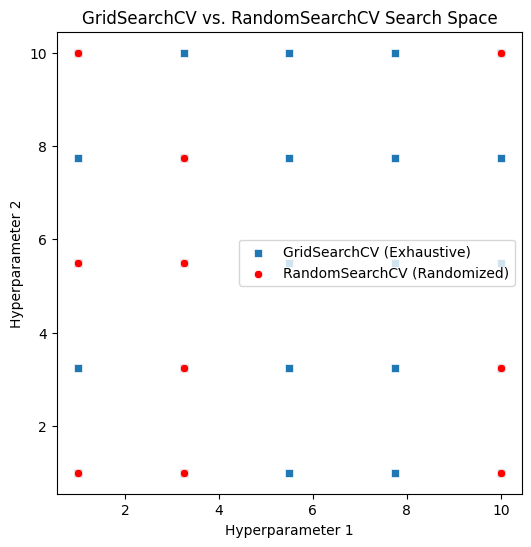

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

param_1 = np.linspace(1, 10, 5)
param_2 = np.linspace(1, 10, 5)
grid_search_points = np.array([(x, y) for x in param_1 for y in param_2])
random_search_points = grid_search_points[np.random.choice(len(grid_search_points), 10, replace=False)]


plt.figure(figsize=(6, 6))
sns.scatterplot(x=grid_search_points[:, 0], y=grid_search_points[:, 1], label="GridSearchCV (Exhaustive)", marker="s")
sns.scatterplot(x=random_search_points[:, 0], y=random_search_points[:, 1], label="RandomSearchCV (Randomized)", color="red")

plt.xlabel("Hyperparameter 1")
plt.ylabel("Hyperparameter 2")
plt.title("GridSearchCV vs. RandomSearchCV Search Space")
plt.legend()
plt.show()

## **Supervised Learning (Lasso & Ridge Regression Case Study)**  

### **Step 1: Train the Models (Baseline Without Tuning)**  
#### **Goal:**
- Train **Lasso and Ridge regression** models.  
- Evaluate their performance before hyperparameter tuning.  

#### **Dataset:**
We will use a sample regression dataset (e.g., `sklearn.datasets.make_regression` or a real-world dataset).  

> **To implement this step, run the following Python code:**  

Lasso Regression MSE: 239.0391
Ridge Regression MSE: 236.7226


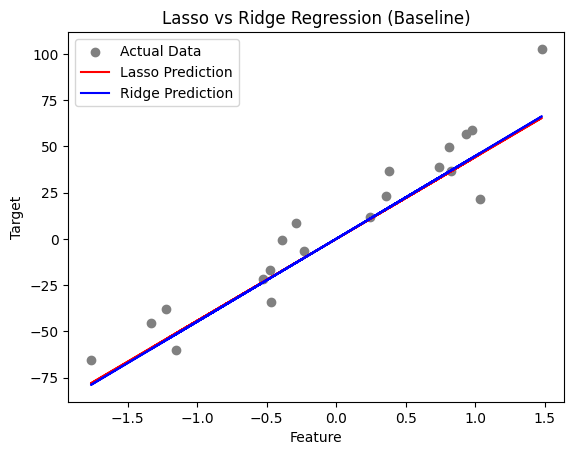

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Lasso Regression MSE: {mse_lasso:.4f}")
print(f"Ridge Regression MSE: {mse_ridge:.4f}")

plt.figure()
plt.scatter(X_test, y_test, color='gray', label="Actual Data")
plt.plot(X_test, y_pred_lasso, color='red', label="Lasso Prediction")
plt.plot(X_test, y_pred_ridge, color='blue', label="Ridge Prediction")

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Lasso vs Ridge Regression (Baseline)")
plt.legend()

plt.show()

This code:  
- **Trains Lasso and Ridge regression models**  
- **Evaluates model performance using Mean Squared Error (MSE)**  
- **Visualizes predictions vs. actual data**

### **Step 2: GridSearchCV Tuning Process and Impact Visualization**
- **Use GridSearchCV** to find the best hyperparameters.  
- **Compare before vs. after tuning**  by visualizing the plot.  

Lasso Regression MSE (After Tuning): 234.4584
Ridge Regression MSE (After Tuning): 234.4569


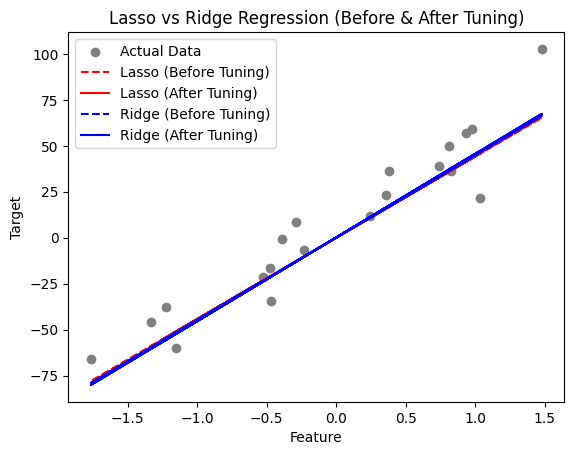

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

param_grid = {'alpha': np.logspace(-3, 2, 20)}

lasso_cv = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)
best_lasso = lasso_cv.best_estimator_

ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_

y_pred_lasso_tuned = best_lasso.predict(X_test)
y_pred_ridge_tuned = best_ridge.predict(X_test)

mse_lasso_tuned = mean_squared_error(y_test, y_pred_lasso_tuned)
mse_ridge_tuned = mean_squared_error(y_test, y_pred_ridge_tuned)

print(f"Lasso Regression MSE (After Tuning): {mse_lasso_tuned:.4f}")
print(f"Ridge Regression MSE (After Tuning): {mse_ridge_tuned:.4f}")

plt.figure()
plt.scatter(X_test, y_test, color='gray', label="Actual Data")
plt.plot(X_test, y_pred_lasso, color='red', linestyle="dashed", label="Lasso (Before Tuning)")
plt.plot(X_test, y_pred_lasso_tuned, color='red', label="Lasso (After Tuning)")
plt.plot(X_test, y_pred_ridge, color='blue', linestyle="dashed", label="Ridge (Before Tuning)")
plt.plot(X_test, y_pred_ridge_tuned, color='blue', label="Ridge (After Tuning)")

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Lasso vs Ridge Regression (Before & After Tuning)")
plt.legend()

### **Step 3: RandomSearchCV Comparison to the GridSearchCV**
#### **Goal:**
- Implementation of **RandomSearchCV** then result comparison with **GridSearchCV**.
- **Advantages and trade-offs** between both methods.

> **Use the Python code below to carry out this step:**

Lasso Regression MSE (GridSearchCV): 234.4584
Lasso Regression MSE (RandomSearchCV): 234.4584
Ridge Regression MSE (GridSearchCV): 234.4569
Ridge Regression MSE (RandomSearchCV): 234.4569


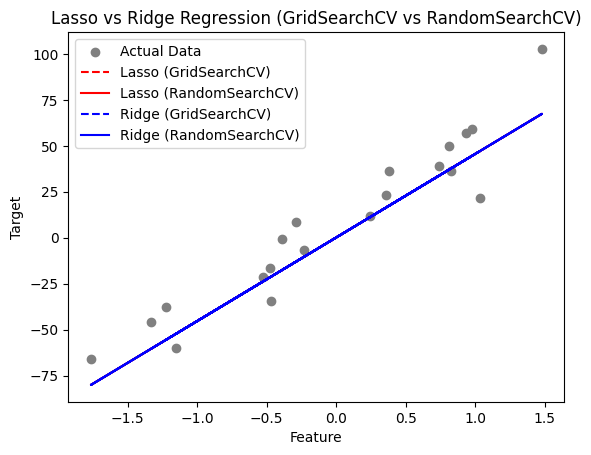

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter distribution
param_dist = {'alpha': np.logspace(-3, 2, 20)}

# Randomized search for Lasso
lasso_random = RandomizedSearchCV(Lasso(), param_distributions=param_dist,
                                    n_iter=5, scoring='neg_mean_squared_error', cv=5, random_state=42)
lasso_random.fit(X_train, y_train)
best_lasso_random = lasso_random.best_estimator_

# Randomized search for Ridge
ridge_random = RandomizedSearchCV(Ridge(), param_distributions=param_dist,
                                    n_iter=5, scoring='neg_mean_squared_error', cv=5, random_state=42)
ridge_random.fit(X_train, y_train)
best_ridge_random = ridge_random.best_estimator_

# Predictions after tuning with RandomSearchCV
y_pred_lasso_random = best_lasso_random.predict(X_test)
y_pred_ridge_random = best_ridge_random.predict(X_test)

#GridSearchCV for comparative purposes.
param_grid = {'alpha': np.logspace(-3, 2, 20)}
lasso_cv = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)
best_lasso_tuned = lasso_cv.best_estimator_
ridge_cv = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)
best_ridge_tuned = ridge_cv.best_estimator_

y_pred_lasso_tuned = best_lasso_tuned.predict(X_test)
y_pred_ridge_tuned = best_ridge_tuned.predict(X_test)

mse_lasso_tuned = mean_squared_error(y_test, y_pred_lasso_tuned)
mse_ridge_tuned = mean_squared_error(y_test, y_pred_ridge_tuned)

# Evaluate performance after tuning with RandomSearchCV
mse_lasso_random = mean_squared_error(y_test, y_pred_lasso_random)
mse_ridge_random = mean_squared_error(y_test, y_pred_ridge_random)

# Print results
print(f"Lasso Regression MSE (GridSearchCV): {mse_lasso_tuned:.4f}")
print(f"Lasso Regression MSE (RandomSearchCV): {mse_lasso_random:.4f}")
print(f"Ridge Regression MSE (GridSearchCV): {mse_ridge_tuned:.4f}")
print(f"Ridge Regression MSE (RandomSearchCV): {mse_ridge_random:.4f}")

# Visualization
plt.figure()
plt.scatter(X_test, y_test, color='gray', label="Actual Data")
plt.plot(X_test, y_pred_lasso_tuned, color='red', linestyle="dashed", label="Lasso (GridSearchCV)")
plt.plot(X_test, y_pred_lasso_random, color='red', label="Lasso (RandomSearchCV)")
plt.plot(X_test, y_pred_ridge_tuned, color='blue', linestyle="dashed", label="Ridge (GridSearchCV)")
plt.plot(X_test, y_pred_ridge_random, color='blue', label="Ridge (RandomSearchCV)")

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Lasso vs Ridge Regression (GridSearchCV vs RandomSearchCV)")
plt.legend()

# Save the plot to a file
plt.savefig("lasso_ridge_randomized_vs_grid.png")
plt.show()

## **Unsupervised Learning (Tuning & Visualizing Clustering Algorithms)**  

Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses.1 Essentially, it seeks to discover hidden patterns or intrinsic structures in data.

Based on the fact that value of K in the K_Means clustering have to be set before the learning process begins, It is considered as an hyperparameter. So we will be looking at ways to find the best **`K`** value for our model.

- K-Means requires choosing the optimal **number of clusters (K)**.  
- Common methods for choosing **K**:  
  - **Elbow Method** (Plots within-cluster sum of squares for different K values).  
  - **Silhouette Score** (Measures how well each point fits into its assigned cluster).  


> **To find the optimal K, run the following Python code:**

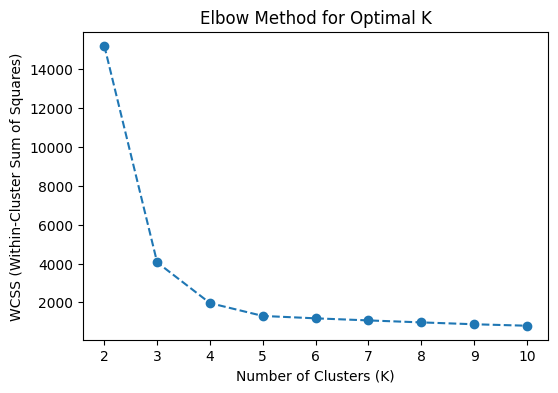

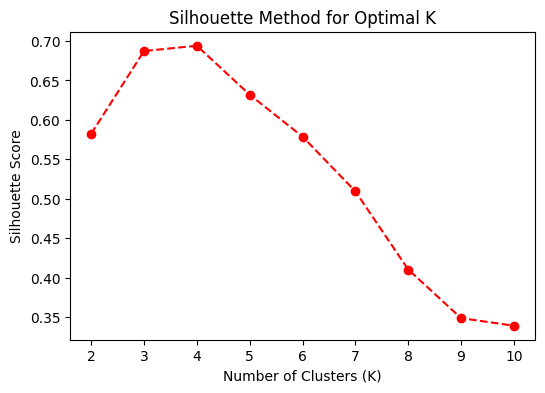

Optimal K (Silhouette Score): 4
Optimal K (Elbow Method): 8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.2, random_state=42)

wcss = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares

plt.figure(figsize=(6, 4))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

sil_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(6, 4))
plt.plot(k_values, sil_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal K")
plt.show()

optimal_k_silhouette = k_values[np.argmax(sil_scores)]
print(f"Optimal K (Silhouette Score): {optimal_k_silhouette}")

differences = np.diff(wcss)
second_differences = np.diff(differences)
optimal_k_elbow = k_values[np.argmin(second_differences) + 2]
print(f"Optimal K (Elbow Method): {optimal_k_elbow}")

 - It can be seen that we got **4** as the optimal `K` from the sillouette score and `K` to be **8** for the Elbow method. We have to note when to use the

### **Comparison between when the `K value was tuned to when it is not tuned`:**
**`Silhouette Method`** was made use of to find the optimal `K` value, then plotted both the default and the tuned value to visualize the difference.

Optimal K (Silhouette Score): 4


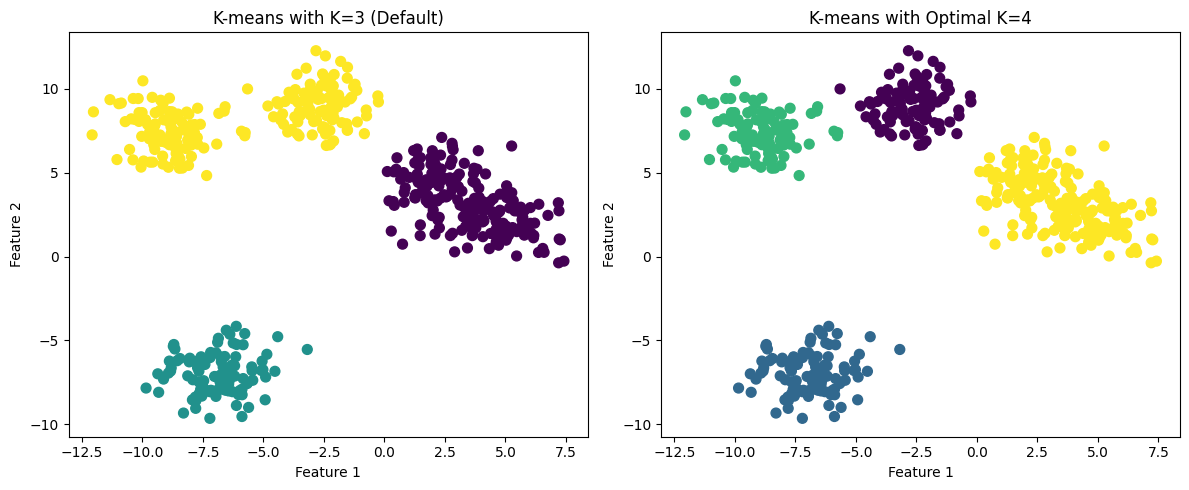

Silhouette Score (Default K=3): 0.687196337449342
Silhouette Score (Optimal K=4): 0.6939481150377808


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.2, random_state=42)

k_values = range(2, 11)
sil_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

optimal_k = k_values[np.argmax(sil_scores)]
print(f"Optimal K (Silhouette Score): {optimal_k}")

kmeans_default = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_default = kmeans_default.fit_predict(X)

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_optimal = kmeans_optimal.fit_predict(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_default, cmap='viridis', s=50)
plt.title(f"K-means with K=3 (Default)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_optimal, cmap='viridis', s=50)
plt.title(f"K-means with Optimal K={optimal_k}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


print(f"Silhouette Score (Default K=3): {silhouette_score(X, labels_default)}")
print(f"Silhouette Score (Optimal K={optimal_k}): {silhouette_score(X, labels_optimal)}")

### **2. Tune DBSCAN (eps, min_samples) Using GridSearchCV**  
- **DBSCAN** (Density-Based Spatial Clustering) requires tuning:  
  - `eps` (radius for defining neighborhoods).  
  - `min_samples` (minimum points required to form a dense cluster).  
- We use **GridSearchCV** to find the best values.  

> **To tune DBSCAN, run the following Python code:**  

### Note the following that:
- GridSearchCV does not support DBSCAN natively so we have to do it manually.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import numpy as np

# DBSCAN parameter grid
param_grid = {
    'eps': np.arange(0.1, 1.1, 0.1),
    'min_samples': range(2, 10)
}


best_score = -1
best_params = None

for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Ignore cases where all points are noise
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best DBSCAN Parameters: {best_params}, Silhouette Score: {best_score:.4f}")

In [ ]:
# Train DBSCAN with the best parameters
best_dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
labels = best_dbscan.fit_predict(X)

# Plot DBSCAN results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"DBSCAN Clustering (eps={best_params['eps']}, min_samples={best_params['min_samples']})")
plt.show()

**The hyperparameter tuning in an unsupervised learning process reviewed in this paper can be summarized as:**

| Model  | Hyperparameters Tuned | Optimization Method |
|--------|---------------------|--------------------|
| **K-Means** | `n_clusters (K)` | Elbow Method, Silhouette Score |
| **DBSCAN** | `eps`, `min_samples` | GridSearchCV-style tuning |

### **Key Insights**  
- **K-Means** requires choosing **K**, which can be optimized using the **Elbow Method or Silhouette Score**.
- **DBSCAN** tuning is harder since it doesn't require K, but optimizing **eps and min_samples** improves performance.
- **GridSearchCV** doesn’t support DBSCAN, so we manually test different hyperparameter combinations.

## **Visualizing DBSCAN Clustering Before vs. After Tuning**  

After determining the **best `eps` and `min_samples`**, we can apply DBSCAN and visualize the results.

### **Code for DBSCAN Clustering Before vs. After Tuning**

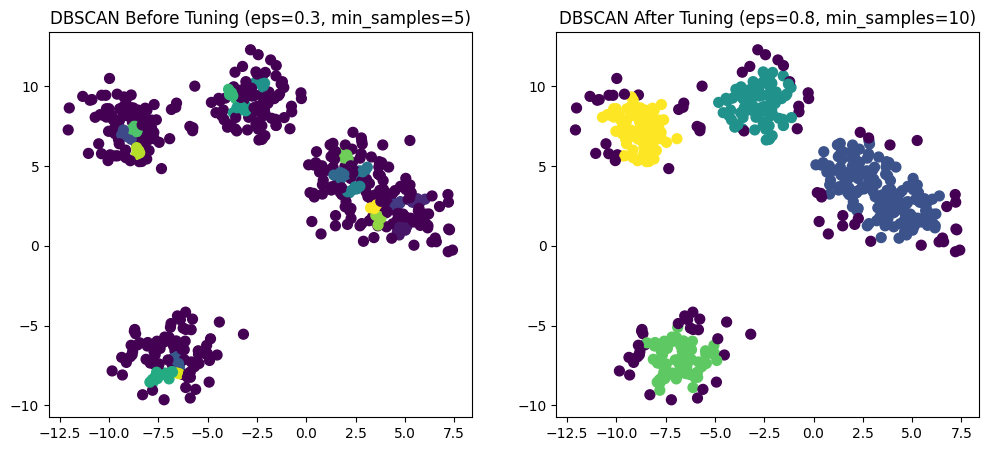

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Generate synthetic clustering data (Assuming X is defined)
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.2, random_state=42)

# Assuming best_params is defined. Here is an example of what it might look like.
best_params = {"eps": 0.8, "min_samples": 10}


dbscan_before = DBSCAN(eps=0.3, min_samples=5)  # arbitrary values picked in this
labels_before = dbscan_before.fit_predict(X)


dbscan_after = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
labels_after = dbscan_after.fit_predict(X)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before Tuning
axes[0].scatter(X[:, 0], X[:, 1], c=labels_before, cmap="viridis", s=50)
axes[0].set_title("DBSCAN Before Tuning (eps=0.3, min_samples=5)")

# After Tuning
axes[1].scatter(X[:, 0], X[:, 1], c=labels_after, cmap="viridis", s=50)
axes[1].set_title(f"DBSCAN After Tuning (eps={best_params['eps']}, min_samples={best_params['min_samples']})")

plt.show()

***It can be seen that we now have a more clear measure of clustering quality.***

## **Best Practices**

**Key Hyperparameters in Unsupervised Learning:**  
- **K-Means:** `K` (number of clusters).  
- **DBSCAN:** `eps` (radius for neighbors) and `min_samples` (minimum points in a dense cluster).  

**Comparison of Tuning Methods:**

| Method | Best for |
|--------|---------|
| **Elbow Method** | Selecting `K` for K-Means (visual method) |
| **Silhouette Score** | Evaluating cluster quality |
| **GridSearchCV (Manual for DBSCAN)** | Finding best `eps` and `min_samples` |

**When to Use K-Means vs. DBSCAN?**  
- **K-Means** is best when clusters are well-separated and spherical.  
- **DBSCAN** is better when dealing with **arbitrary cluster shapes and noise**.  

**Best Practices for Unsupervised Model Tuning:**  
- Always visualize clustering before and after tuning.  
- Use **Elbow & Silhouette Scores** for `K-Means` tuning.  
- For **DBSCAN**, manually search `eps` and `min_samples` using a performance metric like **Silhouette Score**.

Project Repository:
All files and resources are available at:
[github.com/Sunday-Ogunya](https://github.com/Sunday-Ogunya?tab=repositories)
